Saving Respuestas_transformadas.csv to Respuestas_transformadas (12).csv


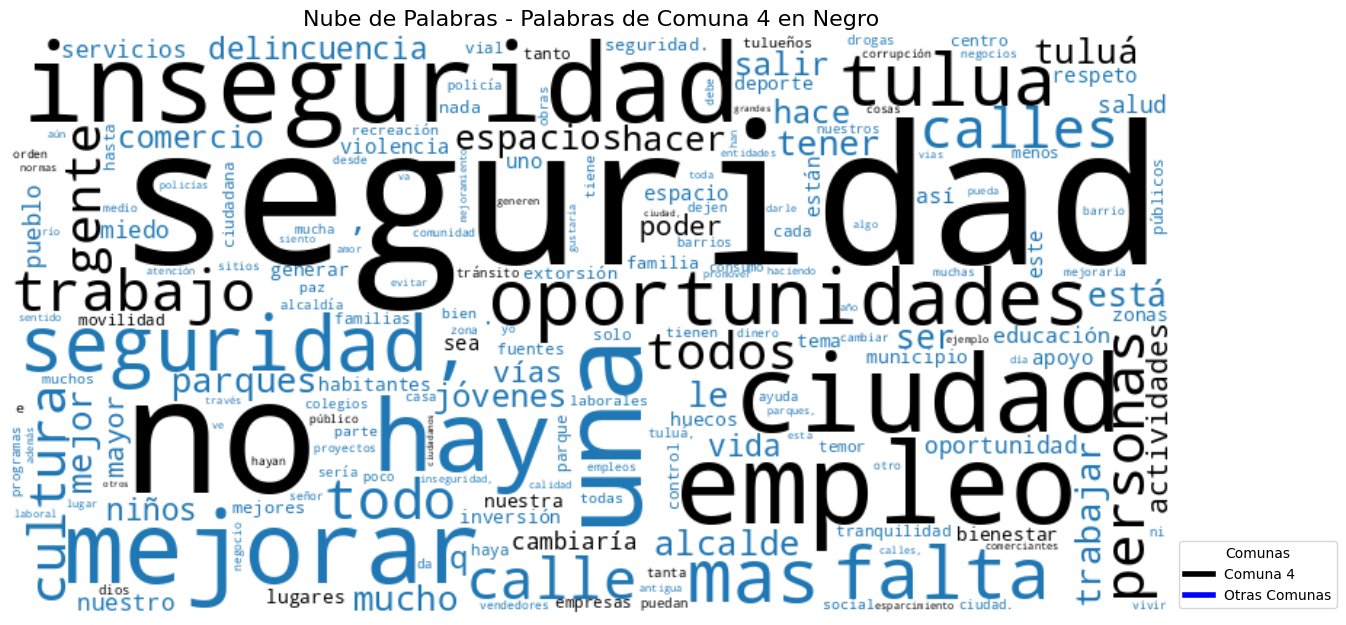

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import files
import pandas as pd

# Subir el archivo
uploaded = files.upload()

# Cargar el archivo en un DataFrame de pandas
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Identificar las columnas relevantes
text_column = "<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>"  # Ajustar si el nombre es diferente
comuna_column = "Comuna"  # Ajustar si el nombre es diferente

# Asegurarse de que los valores de la columna Comuna son cadenas
data[comuna_column] = data[comuna_column].astype(str).str.strip()

# Filtrar filas que tienen información en ambas columnas
filtered_data = data[[text_column, comuna_column]].dropna()

# Filtrar palabras solo para la Comuna 4
comuna_4_data = filtered_data[filtered_data[comuna_column] == "Comuna 4"]

# Lista de palabras irrelevantes (stopwords)
stopwords = set([
    "y", "de", "la", "el", "en", "a", "que", "los", "las", "por", "un", "con", "para",
    "se", "es", "al", "del", "lo", "su", "como", "más", "son", "o", "también", "esto",
    "muy", "ha", "sus", "entre", "cuando", "sin", "sobre", "hacia", "ya", "me", "nos",
    "mi", "tu", "si", "les", "donde", "porque", "qué", "cual", "tú", "pero", "eso"
])

# Procesar palabras de Comuna 4
comuna_4_words = Counter()
for text in comuna_4_data[text_column]:
    words = text.lower().split()
    comuna_4_words.update(word for word in words if word not in stopwords)

# Procesar palabras de otras comunas
other_comunas_data = filtered_data[filtered_data[comuna_column] != "Comuna 4"]
other_comunas_words = Counter()
for text in other_comunas_data[text_column]:
    words = text.lower().split()
    other_comunas_words.update(word for word in words if word not in stopwords)

# Consolidar todas las palabras
all_words = comuna_4_words + other_comunas_words

# Crear función para asignar colores a palabras
def color_func(word, **kwargs):
    # Si la palabra pertenece a la Comuna 4, color negro
    if word in comuna_4_words:
        return 'rgb(0, 0, 0)'  # Negro
    # Para el resto, color azul celeste
    return 'rgb(31, 119, 180)'

# Generar la nube de palabras
final_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=color_func
).generate_from_frequencies(all_words)

# Crear la gráfica de la nube de palabras
plt.figure(figsize=(15, 8))
plt.imshow(final_wordcloud, interpolation='bilinear')
plt.axis('off')

# Crear leyenda para las comunas
legend_patches = [
    plt.Line2D([0], [0], color='black', lw=4, label="Comuna 4"),
    plt.Line2D([0], [0], color='blue', lw=4, label="Otras Comunas")
]

plt.legend(handles=legend_patches, title="Comunas", loc="lower left", bbox_to_anchor=(1, 0))

# Mostrar el gráfico
plt.title("Nube de Palabras - Palabras de Comuna 4 en Negro", fontsize=16)
plt.show()
